In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv ("Ecommerce.csv")
df = data.loc [:, ("Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent")]
df.head(200)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
195,31.820998,10.771074,37.278640,3.519032,424.675281
196,32.733224,11.818572,37.102031,1.503854,352.550108
197,32.407148,13.808799,37.426769,5.039955,662.961088
198,33.506092,11.659833,37.281393,4.478713,560.560161


In [25]:
print ("Shape of dataset:", df.shape)

Shape of dataset: (500, 5)


In [26]:
# Check missing values
print(df.isnull().sum())

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


In [30]:
# Check basic info
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<h1><i>Exploratory Data Analysis:

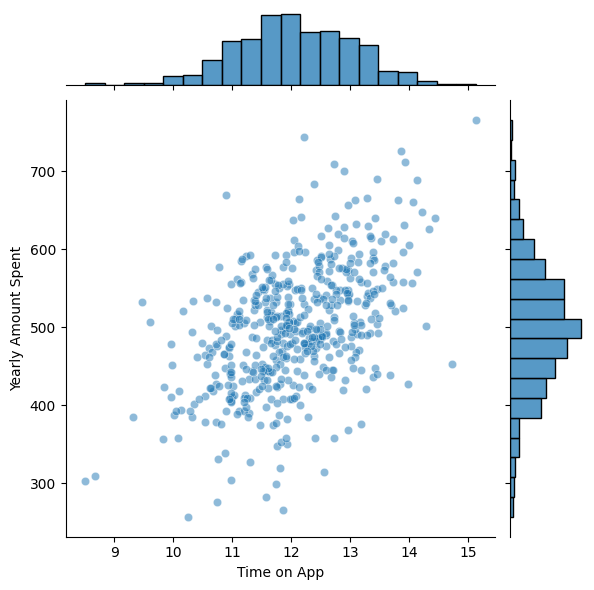

In [38]:
sns.jointplot (x= "Time on App",
             y= "Yearly Amount Spent",
             data = df,
             alpha = 0.5)

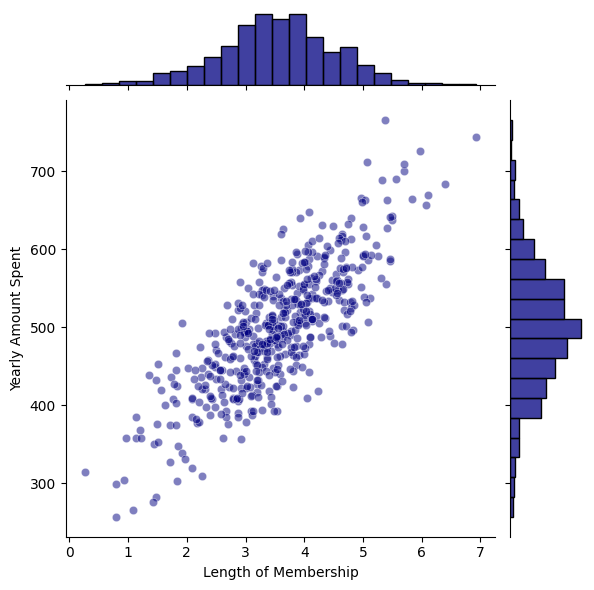

In [35]:
sns.jointplot (x= "Length of Membership",
             y= "Yearly Amount Spent",
             data = df,
             alpha = 0.5,
            color="navy")

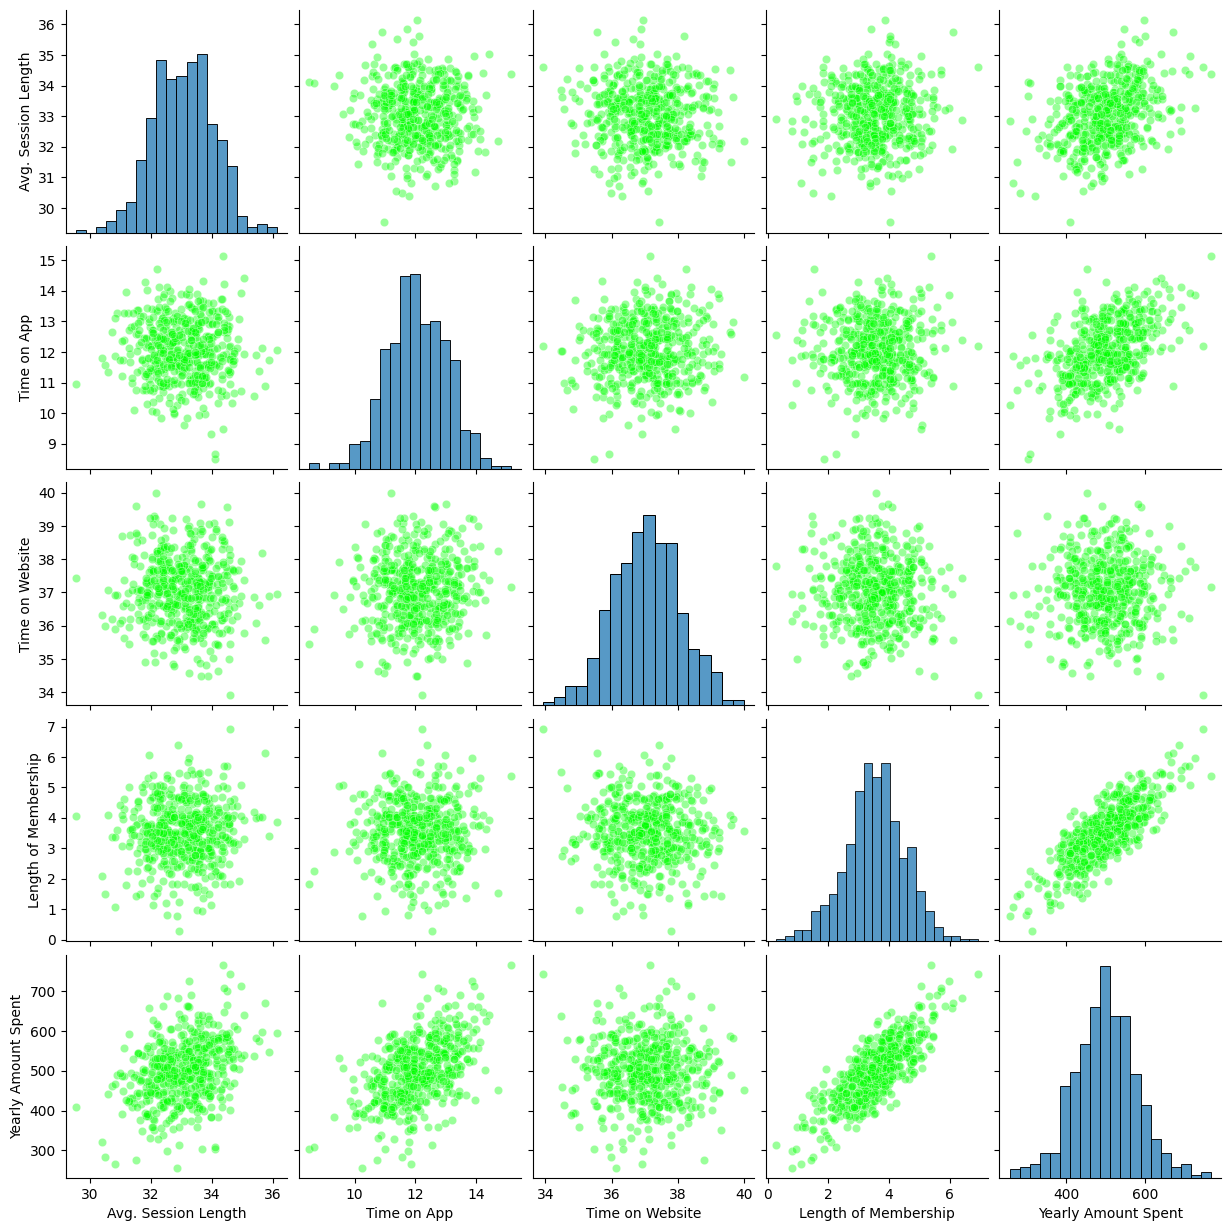

In [45]:
sns.pairplot (df, kind="scatter", plot_kws = {"alpha":0.4,"color":"lime"})

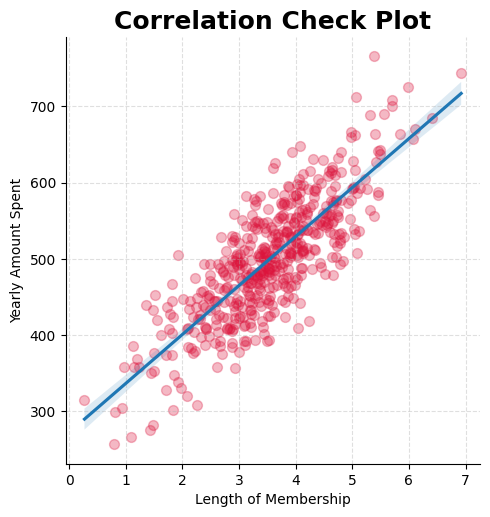

In [62]:
sns.lmplot (x="Length of Membership",y= "Yearly Amount Spent",data= df,
            scatter_kws={"alpha": 0.3,
            "color":"crimson",
                        "s":50})

plt.title ("Correlation Check Plot", fontweight= "bold", fontsize= "18")
plt.grid (alpha = 0.4, linestyle= "--")
sns.despine()
plt.show()

<H1><I><B>COORELATION CHECK

In [ ]:
coor = data['Length of Membership'].corr(data['Yearly Amount Spent'])
print ("Correlation value:",coor)  # 0.7 to 1 -> Strongly linear

Correlation value: 0.8090835682475811


In [65]:
# Check correlation matrix
corr_matrix = df.corr(numeric_only= True)
print(corr_matrix['Yearly Amount Spent'].sort_values(ascending=False))

Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.002641
Name: Yearly Amount Spent, dtype: float64


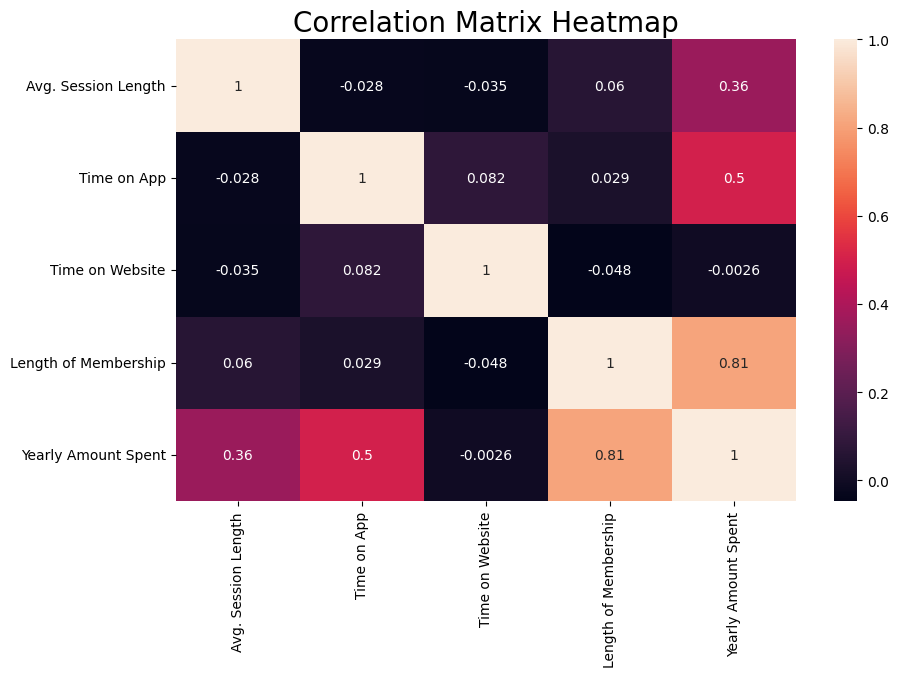

In [74]:
# Lets visualize it on a Plot
plt.figure (figsize=(10,6))
sns.heatmap (corr_matrix ,annot = True)  # Annot shows corr number
plt.title("Correlation Matrix Heatmap",fontsize= 20)
plt.show()

In [75]:
X = data[["Length of Membership"]]
Y = data["Yearly Amount Spent"]

In [138]:
from sklearn.model_selection import train_test_split

x_test,x_train,y_test,y_train = train_test_split (X,Y, test_size= 0.2, random_state= 42)

<h1><i><b>Training the Model

In [139]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit (x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [140]:
Coef = pd.DataFrame (model.coef_, X.columns, columns= ["Coefficents"])
Coef

,Coefficents
Length of Membership,61.403806


In [141]:
print("Weight (w):", model.coef_[0])
print("Bias (b):", model.intercept_)

Weight (w): 61.40380636773195
Bias (b): 280.1325691323117


In [142]:
pred = model.predict(x_test)
pred

array([503.33516005, 410.14791672, 529.7113213 , 531.06329729,
       414.61502176, 464.08370871, 458.09919521, 467.45795782,
       506.7074945 , 432.02078637, 433.13068599, 517.14008615,
       485.78898408, 447.25751897, 606.8065826 , 560.11544874,
       530.52348166, 371.88894599, 587.44760278, 538.91860933,
       506.01196029, 573.24382595, 353.84684742, 653.26223251,
       488.74359464, 442.76649236, 458.85024018, 469.7944331 ,
       532.2599846 , 392.10825464, 493.29056859, 451.41612395,
       465.7363662 , 587.59812863, 523.22362316, 483.69998799,
       526.72943518, 630.45073884, 428.77928189, 541.52754676,
       525.85748303, 469.98250755, 391.93727176, 537.61866309,
       498.59587255, 512.50134101, 520.79264918, 519.17092379,
       492.35848159, 527.10499738, 617.4548216 , 449.20329364,
       505.06118942, 472.7030552 , 422.62318734, 449.72140407,
       471.72342294, 421.82507119, 519.88246493, 565.00449647,
       486.56078337, 496.00921007, 509.67382383, 571.34

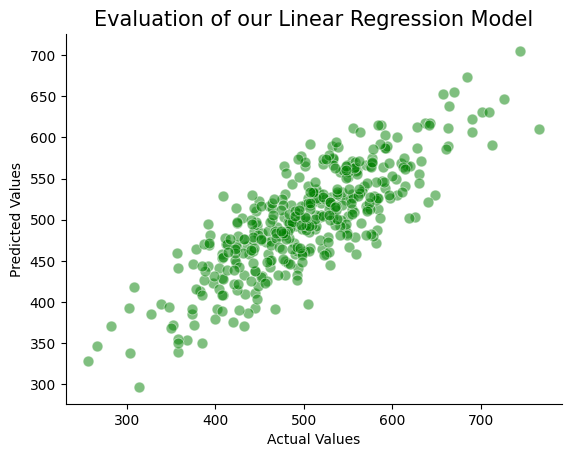

In [143]:
sns.scatterplot (x= y_test, y= pred, color="green", s=60, alpha=0.5 )
plt.xlabel("Actual Values")
plt.title ("Evaluation of our Linear Regression Model",
          fontsize= 15)

plt.ylabel("Predicted Values")
sns.despine()
plt.show()

In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = math.sqrt(mse)  # RMSE = sqrt(MSE)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 2189.1388797588816
MAE: 37.328709298131145
RMSE: 46.78823441591787


In [145]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, pred)
print("R² Score:", r2)

R² Score: 0.6670015873608233


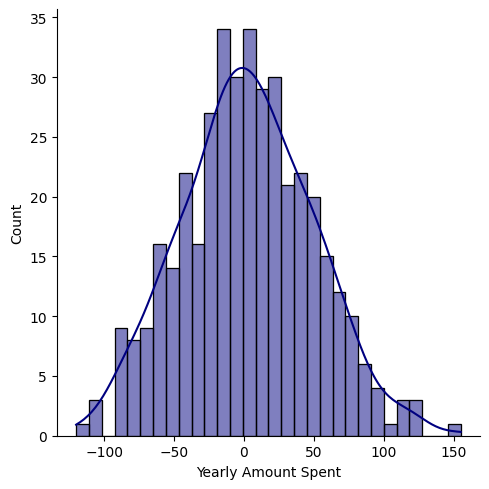

In [146]:
residuals = y_test - pred
sns.displot (residuals,bins= 30, kde=True, color="navy")

In [147]:
# Residual Mean
R_mean = residuals.mean()
print ("Residual Mean:",R_mean)

Residual Mean: 2.766849923807298


In [148]:
target_mean = data['Yearly Amount Spent'].mean()
percentage = abs(R_mean) / target_mean * 100
print(f"Comparison of Residual with Targeted: {percentage:.2f}%")

Comparison of Residual with Targeted: 0.55%


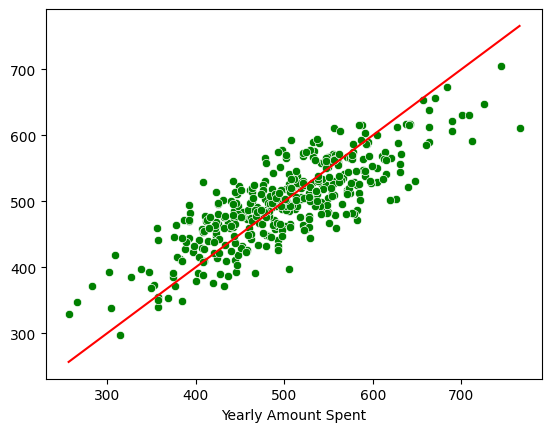

In [149]:
sns.scatterplot(x=y_test, y=pred, color='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

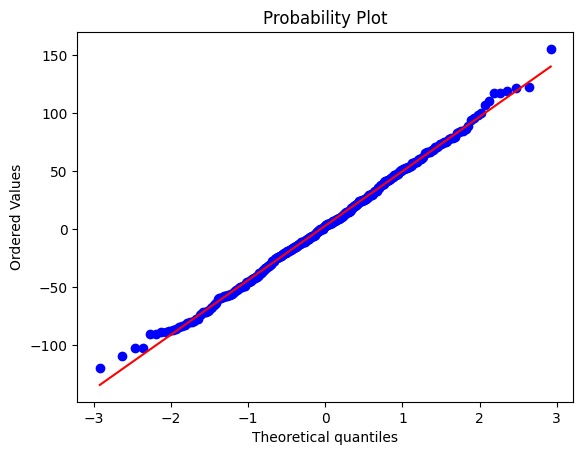

In [150]:
import pylab
import scipy.stats as stats

stats.probplot (residuals, dist="norm", plot=pylab)
pylab.show()